<a href="https://colab.research.google.com/github/zal-developer/Production-of-Product-Sales./blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Zalwango Diana

## Project Overview

## Load and Inspect Data

In [37]:
#Loading the data
import pandas as pd
#copy file path
fpath='/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df=pd.read_csv(fpath)

In [38]:
#preview a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [39]:
#preview the first rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

1. Number of rows and columns

In [40]:
#number of rows
len(df)

8523

In [41]:
#number of columns
len(df.columns)

12

2. Checking datatypes

In [42]:
#checking datatypes of variables
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3. Finding and removing duplicates

In [43]:
#check for duplicates
duplicated_rows=df.duplicated()
duplicated_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [44]:
#counting duplicate rows
df.duplicated().sum()

0

In [45]:
#checking duplicate rows shown
df[duplicated_rows]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [46]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

4. Identify missing values

In [47]:
#Identifying missing values
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
#counting the missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5. placeholder

In [49]:
#addressing missing value by placeholder
df = df.fillna('MISSING')

6. Confirm no missing values

In [50]:
#confirm that the missing values are gone
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7. Inconsistent categories of data

In [51]:
#Identifying string columns
string_cols=df.select_dtypes('object').columns
string_cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [52]:
#obtain value counts for all string columns
for col in string_cols:
  print(f'value_counts for {col}')
  print(df[col].value_counts())
  print('\n')

value_counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


value_counts for Item_Weight
MISSING    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: Item_Weight, Length: 416, dtype: int64


value_counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


value_counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks          

In [53]:
#Fixing the inconsistencies
import pandas as pd
df[string_cols]=df[string_cols].astype(object)

In [54]:
print('\n object values after fixing:')
print(df[string_cols])


 object values after fixing:
     Item_Identifier Item_Weight Item_Fat_Content              Item_Type  \
0              FDA15         9.3          Low Fat                  Dairy   
1              DRC01        5.92          Regular            Soft Drinks   
2              FDN15        17.5          Low Fat                   Meat   
3              FDX07        19.2          Regular  Fruits and Vegetables   
4              NCD19        8.93          Low Fat              Household   
...              ...         ...              ...                    ...   
8518           FDF22       6.865          Low Fat            Snack Foods   
8519           FDS36        8.38          Regular           Baking Goods   
8520           NCJ29        10.6          Low Fat     Health and Hygiene   
8521           FDN46        7.21          Regular            Snack Foods   
8522           DRG01        14.8          Low Fat            Soft Drinks   

     Outlet_Identifier Outlet_Size Outlet_Location_Type  

8. Summary statistics for numerical columns.

In [55]:
#describing summary statistics of numeric columns
#min
import pandas as pd
numerical_summary=df.describe()
min_values=numerical_summary.loc['min']
print(min_values)

Item_Visibility                 0.00
Item_MRP                       31.29
Outlet_Establishment_Year    1985.00
Item_Outlet_Sales              33.29
Name: min, dtype: float64


In [56]:
#max
max_values = numerical_summary.loc['max']
print(max_values)

Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
Name: max, dtype: float64


In [57]:
#mean
mean_values = numerical_summary.loc['mean']
print(mean_values)

Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
Name: mean, dtype: float64


## Exploratory Data Analysis

For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

- Histograms to view the distributions of numerical features in your dataset.
- Boxplots to view statistical summaries of numerical features in your dataset.
- Countplots to view the frequency of each class of categorial features in your dataset.
- Heatmap to view the correlation between features.

In [58]:
#checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 865.6+ KB


       - For each numeric feature,we will plot a histogram and a boxplot.

In [59]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [60]:
num_cols=df.select_dtypes('number').columns
num_cols

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

 a\) Histograms to view the distributions of numerical features in your dataset.

In [61]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes share the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = {mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = {med_value:,.2f}");

  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

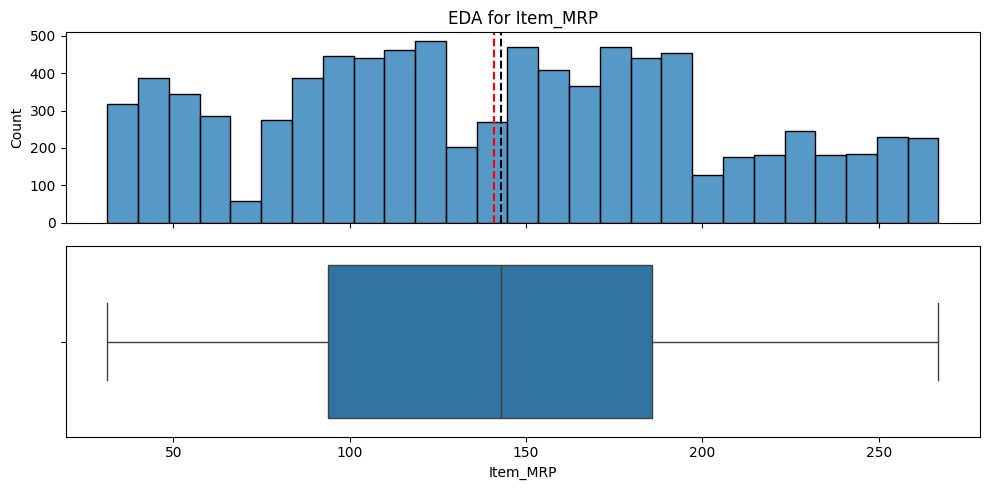

In [62]:
plot_numeric(df, 'Item_MRP')

     -  The median retail price is about 140.
     - There are no outliers in this column which shows that the retail price are relatively uniform in the dataset.

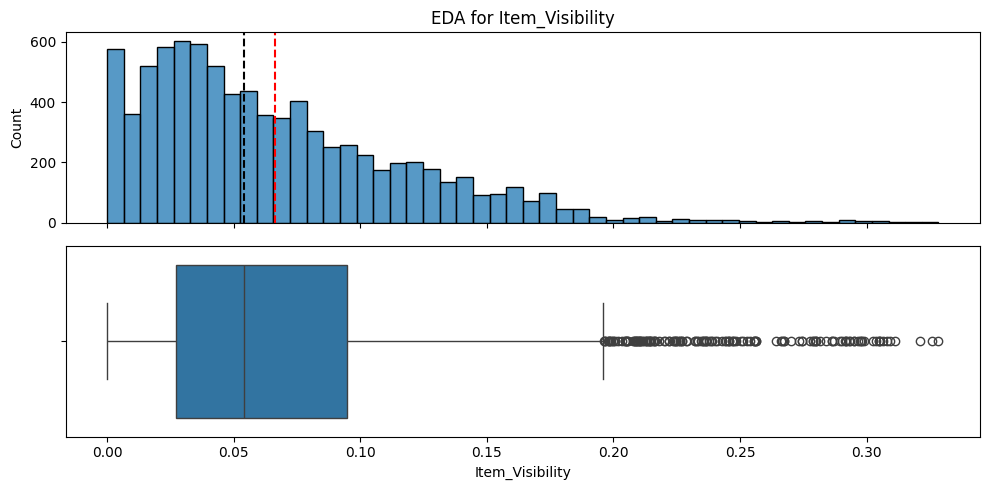

In [63]:
plot_numeric(df,'Item_Visibility')

- The barplot seems to have a big number of items with low visibility percentage whose count is below 200.
- We are having many outliers from this column. These could be items that are highly given display space or marginalized with low percentages of visibility compared to other items.
The items above the median percentage of visibility can bring in more sales compared to those below the median percentage of visibility.

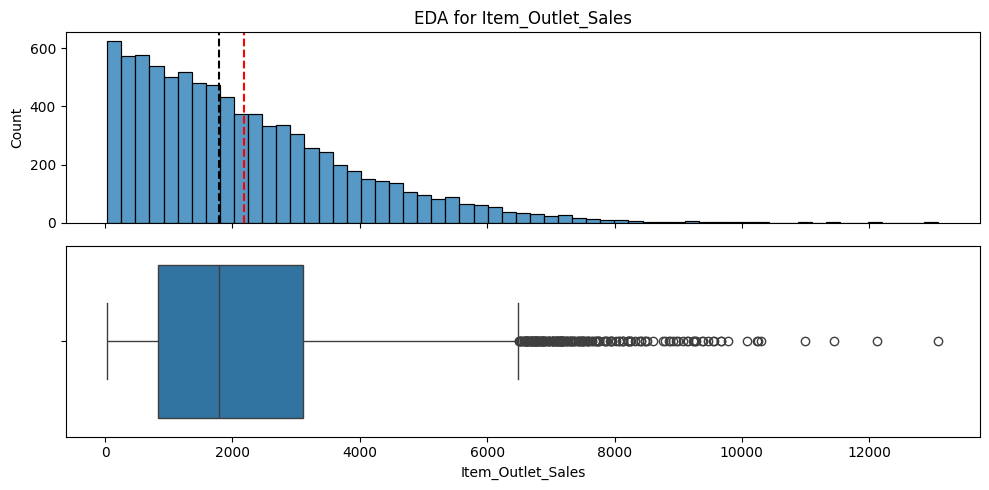

In [64]:
plot_numeric(df, 'Item_Outlet_Sales')

- There are less item outlet sales that are above the median sales,this shows that they are for the items most sought after.
- The sales above median are consistently high compared to those below median which keep reducing.

 - There are several data points with seemingly low sales compared to the rest of the items.

b\) Countplots to view the frequency of each class of categorial features in your dataset.

In [65]:
##Finding the categorical features
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [66]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(15,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.

    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 45)
    ax.set_title(f'Categorical Frequencies of {y}');
    ax.set_xlabel(f'Categories for {y}')
    ax.set_ylabel('Counts')

    return fig,ax

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


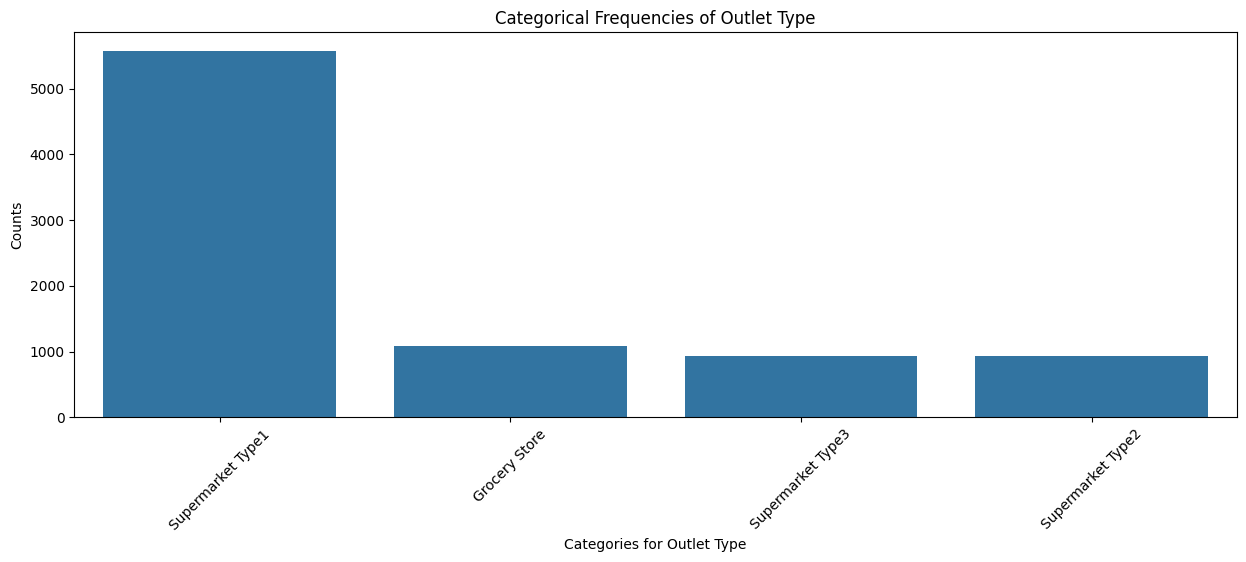

In [67]:
fig, ax = plot_bar(df, 'Outlet_Type', 'Outlet Type');
print(df['Outlet_Type'].value_counts())

- From this graph, we can see that the supermarket type 1 sells out more items than the rest of the outlet types.

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


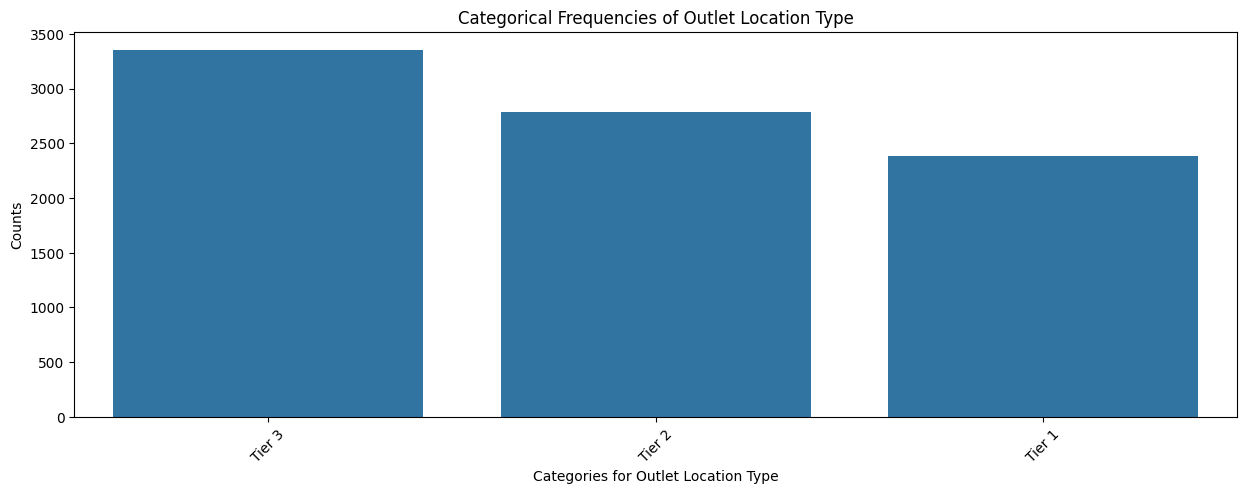

In [68]:
fig, ax = plot_bar(df, 'Outlet_Location_Type', 'Outlet Location Type');
print(df['Outlet_Location_Type'].value_counts())

- The location of Tier3 is where most outlets are operating from.

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


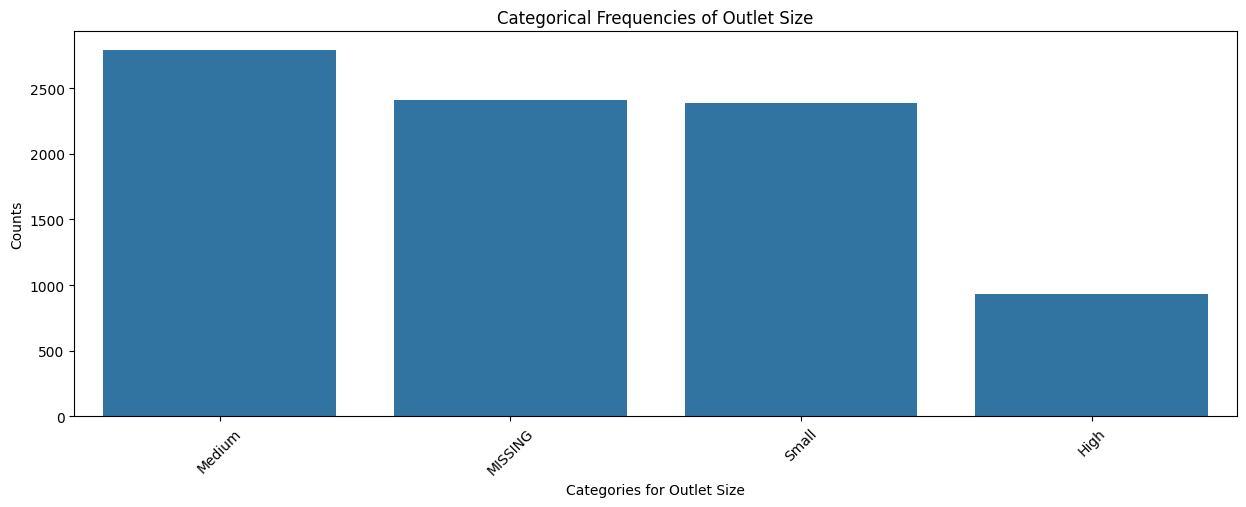

In [69]:
fig, ax = plot_bar(df, 'Outlet_Size', 'Outlet Size');
print(df['Outlet_Size'].value_counts())

- From this graph, the medium size outlets are performimg way better than the small and the high size oulets(minus the MISSING category)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


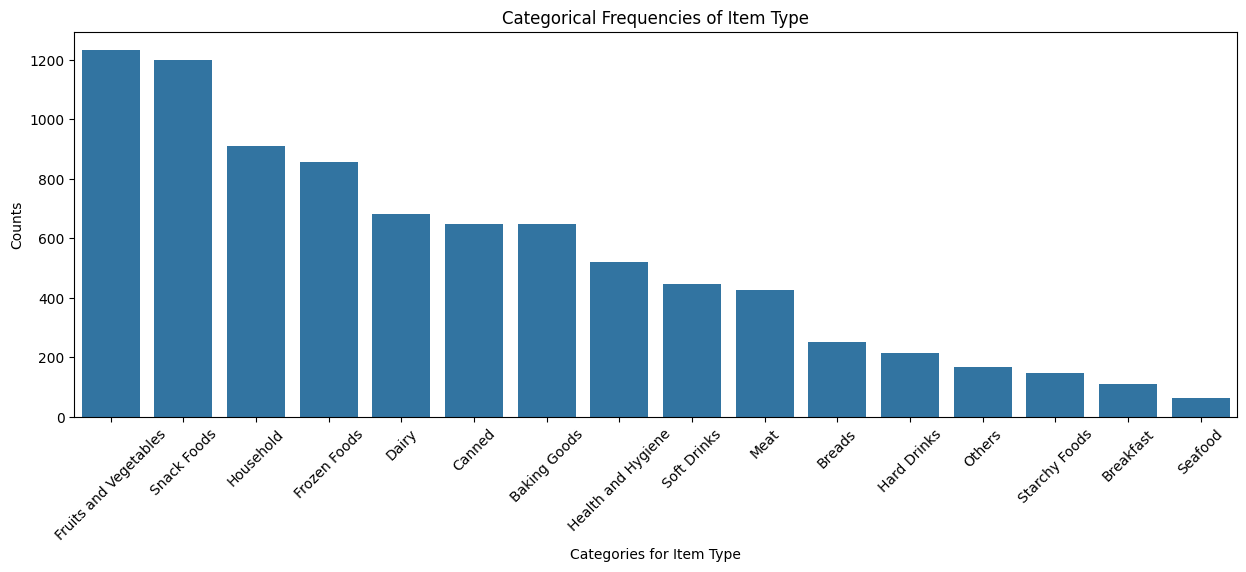

In [70]:
fig, ax = plot_bar(df, 'Item_Type', 'Item Type');
print(df['Item_Type'].value_counts())

- fruits and vegetables, snacks and household items are the leading items in sales while seafoods  and breakfast are preferred by less numbers of people.

In [71]:
#Plotting a bar chart of a cat coloumn
def plot_bar(data,x, y, figsize=(15,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.
    ## standardize the values in the column
    data[x]=data[x].str.lower().replace({'lf':'low fat','reg':'regular'})

    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 45)
    ax.set_title(f'Categorical Frequencies of {y}');
    ax.set_xlabel(f'Categories for {y}')
    ax.set_ylabel('Counts')

    return fig,ax

low fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64


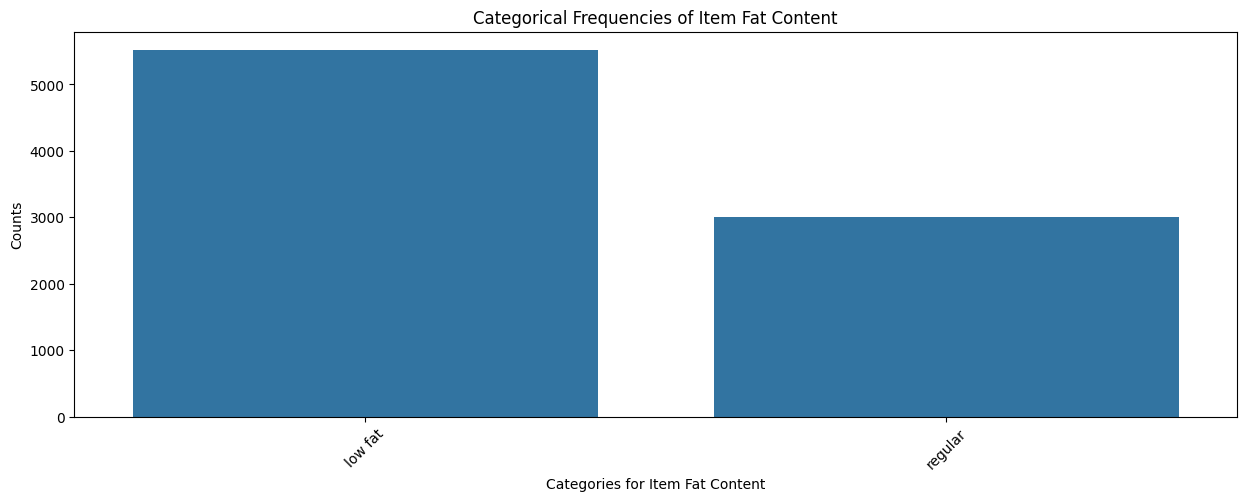

In [72]:
fig, ax = plot_bar(df, 'Item_Fat_Content', 'Item Fat Content');
print(df['Item_Fat_Content'].value_counts())

- Items with low fat levels have the highest sales compared to regular fat items.This could be from how they are priced or the percentage of visibility arcoded to them.

c\) Heatmap to view the correlation between features.

In [73]:
corr = df.corr(numeric_only=True)
corr.round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.00,-0.00,-0.07,-0.13
Item_MRP,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.13,0.57,-0.05,1.00


<ipython-input-74-3b40311094a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Greens');


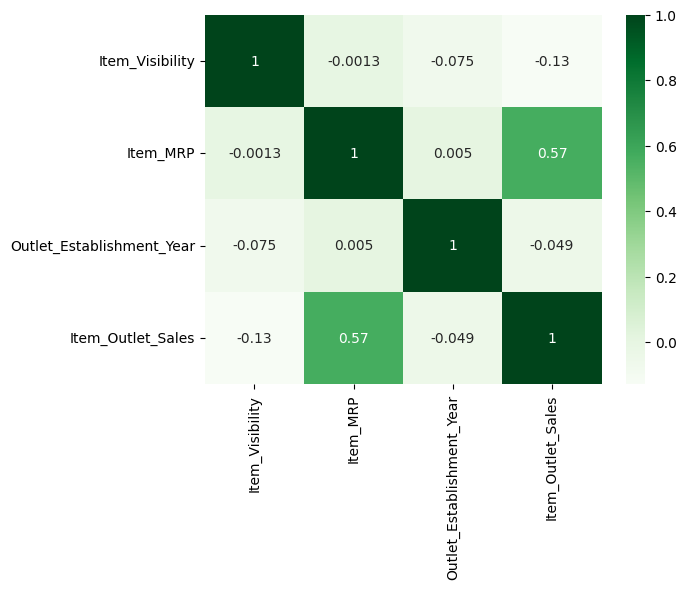

In [74]:
sns.heatmap(df.corr(),annot=True,cmap='Greens');

- There is moderate positive correlation of 0.57 between Item MRP and the Item Outlet sales,showing that as as prices of items increase, the higher the sales generated.
- There is a weak positive correlation between Item weight and Item MRP of 0.027,showing that as the item weight increases, the retail price also increases.

- There is a weak negative correlation between Item weight and Item visibility of -0.014 showing that as the weight increases,there is lower percentage of visibility of the items.
- There is a negative correlation between Item visibility and Outlet year of establishment of -0.07 showing that as the visibility of the item decreases,the Year of Establishment of the outlet shows to be earlier. This also shows that older outlets might have lower percentages of visibility of the Items.

## Feature Inspection

In [75]:
#Remove the placeholders you added in week 2 and replace them with null values.
import pandas as pd
df.replace('MISSING', pd.NA, inplace=True)

In [76]:
#verify the updated dataframe
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [77]:
#displaying the first 5 rows to check for NaN
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,<NA>,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


For each feature:

- Add a new markdown header.
- Paste the feature's definition from the data dictionary into a markdown cell.
- Create a univariate visualization showing the distribution of values/categories.

In [78]:
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [79]:
# Final version of function
def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax



### Item_Identifier

0) Data dictionary

*   Product ID



1) Univariate Visualization

In [80]:
# Confirming the dtype to select correct EDA function
feature = 'Item_Identifier'
df[feature].dtype

dtype('O')

<ipython-input-78-6787954fdc8f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


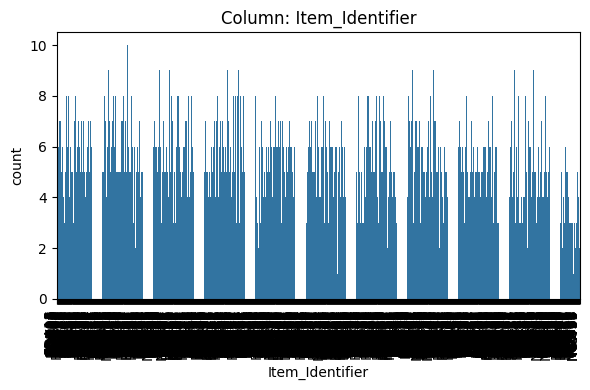

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [81]:
# Calling our custom EDA function
explore_categorical(df, 'Item_Identifier');

**Feature Observations**


1.  What type of feature is it? (Categorical (nominal), ordinal, numeric)

     - Categorical(nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    - zero null values.(o.o%)

    - Nothing to drop or impute

3. Is the feature constant or quasi-constant?
    - No

4. What is the cardinality? Is it high (>10)?
    - 1559 unique categories, its high

5. Would we know this feature before the target is determined?
    - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
    - No,it helps customers identify the items easily.

<ipython-input-79-8eb5ed0aa4ee>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


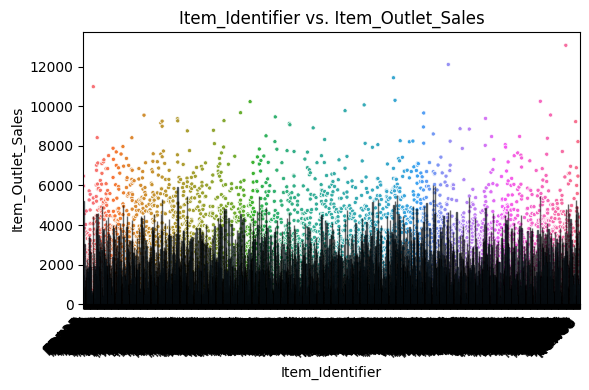

In [82]:
# Run the appropriate feature vs. target function (based on dtype)
fig, ax = plot_categorical_vs_target(df, x='Item_Identifier', y='Item_Outlet_Sales', fillna=False)

-  Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes, the more common an id appears the more sales.


-  Does this feature appear to be a predictor of the target?
     - Yes it does,items that are easily identified are bought more.




---



### Item Fat Content

0) Data Dictionary

-    Whether the product is low-fat or regular

1) Univariate Viz

In [83]:
# Confirming the dtype to select correct EDA function
feature = 'Item_Fat_Content'
df[feature].dtype

dtype('O')

<ipython-input-78-6787954fdc8f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


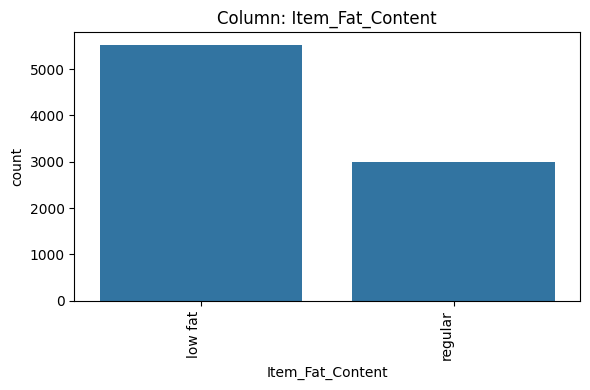

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'low fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [84]:
#Calling our custom EDA function
explore_categorical(df, 'Item_Fat_Content');

2) Feature Observations


1.  What type of feature is it? (Categorical (nominal), ordinal, numeric)

     - Categorical(nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    - zero null values.(o.o%)

    - Nothing to drop or impute

3. Is the feature constant or quasi-constant?
    - No

4. What is the cardinality? Is it high (>10)?
    - 2 unique categories, its low

5. Would we know this feature before the target is determined?
    - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
    - No,the sellers have no influence in determining the fat content of the items.

<ipython-input-79-8eb5ed0aa4ee>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


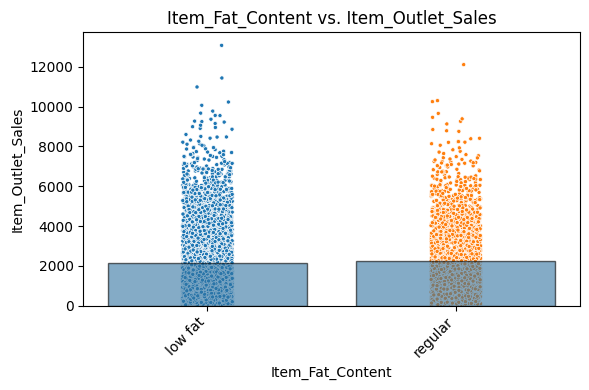

In [85]:
# Run the appropriate feature vs. target function (based on dtype)
fig, ax = plot_categorical_vs_target(df, x='Item_Fat_Content', y='Item_Outlet_Sales', fillna=False)

-  Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes,the customers would buy more items with desired fat content depending on their age,health situations and tastes.


-  Does this feature appear to be a predictor of the target?
     -Yes it does, items with low fat content seem to be bringing in more sales.




---



### Item Type

0) Data dictionary

-  The category to which the product belongs

1) Univariate Viz

In [86]:
#Confirming the dtype to select correct EDA function
feature = 'Item_Type'
df[feature].dtype

dtype('O')

<ipython-input-78-6787954fdc8f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


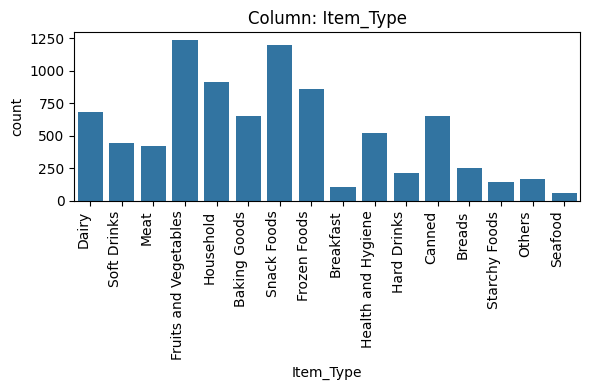

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [87]:
#Calling our custom EDA function
explore_categorical(df, 'Item_Type');

2) Feature Observations.

1.  What type of feature is it? (Categorical (nominal), ordinal, numeric)

     - Categorical(nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    - zero null values.(o.o%)

    - Nothing to drop or impute

3. Is the feature constant or quasi-constant?
    - No

4. What is the cardinality? Is it high (>10)?
    - 16 unique categories, its high

5. Would we know this feature before the target is determined?
    - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
    - No, this is what is bringing customers to the outlets.

<ipython-input-79-8eb5ed0aa4ee>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


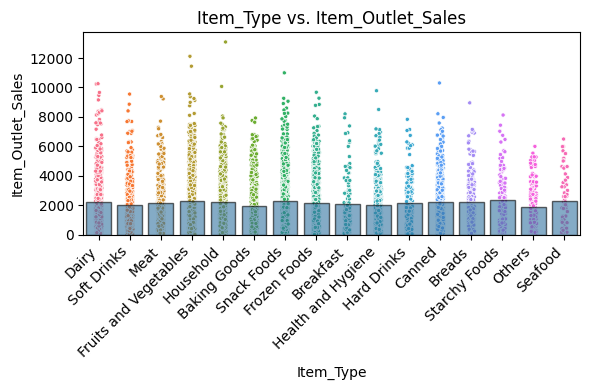

In [88]:
# Run the appropriate feature vs. target function (based on dtype)
fig, ax = plot_categorical_vs_target(df, x='Item_Type', y='Item_Outlet_Sales', fillna=False)

-  Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes,availability of the item types would impact the outlet sales.


-  Does this feature appear to be a predictor of the target?
     
     - Yes, the range of the fruits and vegetables type is wide and thus more sales.




---



### Outlet Identifier

0) Data dictionary

-   Store ID

1) Univariate Viz

In [89]:
#Confirming the dtype to select correct EDA function
feature = 'Outlet_Identifier'
df[feature].dtype

dtype('O')

<ipython-input-78-6787954fdc8f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


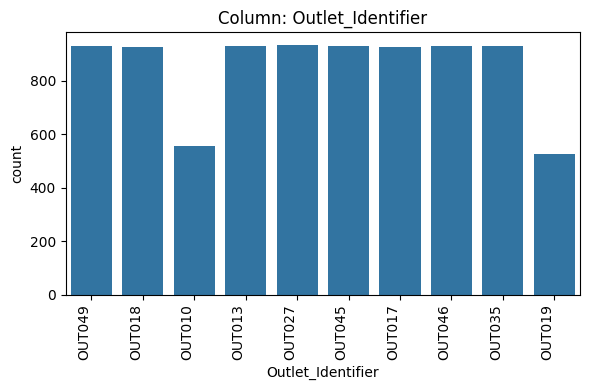

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [90]:
#Calling our custom EDA function
explore_categorical(df, 'Outlet_Identifier');

2) Feature Observations

1.  What type of feature is it? (Categorical (nominal), ordinal, numeric)

     - Categorical(nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    - zero null values.(o.o%)

    - Nothing to drop or impute

3. Is the feature constant or quasi-constant?
    - No

4. What is the cardinality? Is it high (>10)?
    - 10 unique categories, its low

5. Would we know this feature before the target is determined?
    - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
    - No, this feature enables us to uniquely identify each store.

<ipython-input-79-8eb5ed0aa4ee>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


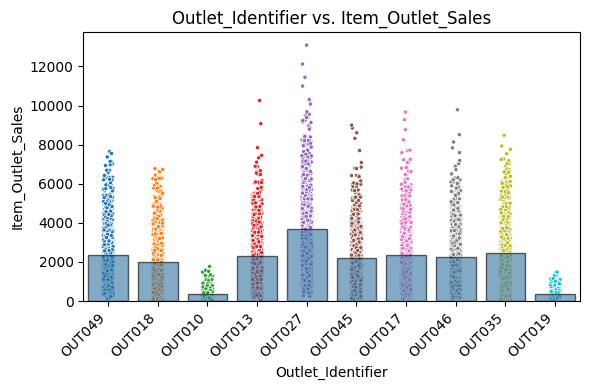

In [91]:
# Run the appropriate feature vs. target function (based on dtype)
fig, ax = plot_categorical_vs_target(df, x='Outlet_Identifier', y='Item_Outlet_Sales', fillna=False)

-  Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes,underperforming outlets would lead to certain decisions to be taken.


-  Does this feature appear to be a predictor of the target?
     - Yes,There is significant variability in the outlet sales for different outlets.




---



### Outlet Size

0) Data dictionary

-   The size of the store in terms of ground area covered

1) Univariate viz

In [92]:
#Confirming the dtype to select correct EDA function
feature = 'Outlet_Size'
df[feature].dtype

dtype('O')

<ipython-input-78-6787954fdc8f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


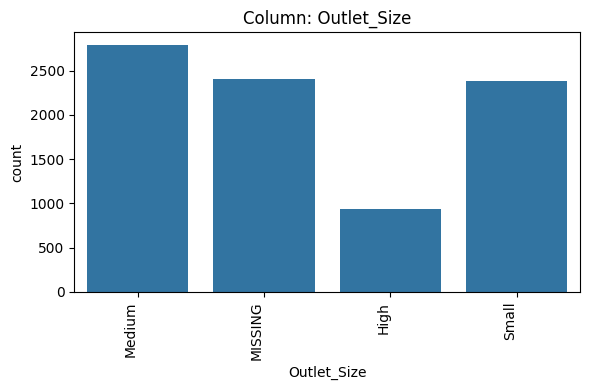

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [93]:
#Calling our custom EDA function
explore_categorical(df, 'Outlet_Size');

2) Feature Observations.

1.  What type of feature is it? (Categorical (nominal), ordinal, numeric)

     - Categorical(nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    - 2410 null values.(28.28%)

    - impute with mode

3. Is the feature constant or quasi-constant?
    - No

4. What is the cardinality? Is it high (>10)?
    - 4 unique categories, its low

5. Would we know this feature before the target is determined?
    - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
    - No.

In [94]:
#filter to view null values
# Save filter of null outlet size
filter_null_Outlet_Size = df['Outlet_Size'].isna()
filter_null_Outlet_Size.sum()

2410

In [95]:
#Filter the  column for rows missing size
check_size = df.loc[filter_null_Outlet_Size]
check_size

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,<NA>,Tier 3,Grocery Store,732.3800
8,FDH17,16.2,regular,0.016687,Frozen Foods,96.9726,OUT045,2002,<NA>,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2,regular,0.094450,Frozen Foods,187.8214,OUT017,2007,<NA>,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.0,low fat,0.099887,Household,45.9060,OUT017,2007,<NA>,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,regular,0.161467,Dairy,45.5086,OUT010,1998,<NA>,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.42,low fat,0.070712,Household,216.4192,OUT045,2002,<NA>,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.35,regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,<NA>,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.1,low fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,<NA>,Tier 3,Grocery Store,424.7804
8514,FDA01,15.0,regular,0.054489,Canned,57.5904,OUT045,2002,<NA>,Tier 2,Supermarket Type1,468.7232


<ipython-input-79-8eb5ed0aa4ee>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


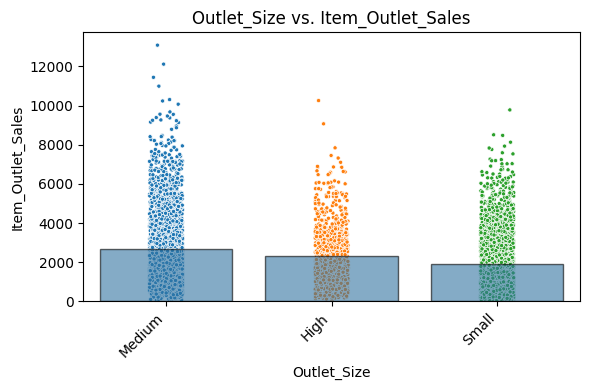

In [96]:
# Run the appropriate feature vs. target function (based on dtype)
fig, ax = plot_categorical_vs_target(df, x='Outlet_Size', y='Item_Outlet_Sales', fillna=False)

-  Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, customers enjoy their shopping experience due to the space in the outlets with variety of items.


-  Does this feature appear to be a predictor of the target?
     
     - Yes, high-size otlets seem to have lower average sales which maybe due to factors like limited range of items thus less customers.




---



### Outlet Location Type

0) Data dictionary
-  The type of area in which the store is located

1) Univariate Viz

In [97]:
#Confirming the dtype to select correct EDA function
feature = 'Outlet_Location_Type'
df[feature].dtype

dtype('O')

<ipython-input-78-6787954fdc8f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


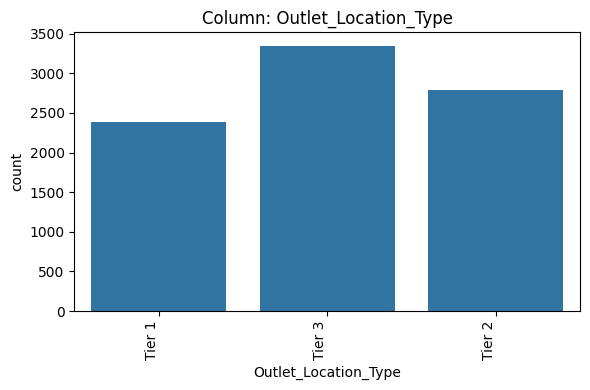

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [98]:
#Calling our custom EDA function
explore_categorical(df, 'Outlet_Location_Type');

2) Feature Observations

1.  What type of feature is it? (Categorical (nominal), ordinal, numeric)

     - Categorical(nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    - zero null values.(o.o%)

    - Nothing to drop or impute

3. Is the feature constant or quasi-constant?
    - No

4. What is the cardinality? Is it high (>10)?
    - 3 unique categories, its low

5. Would we know this feature before the target is determined?
    - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
    - No.

<ipython-input-79-8eb5ed0aa4ee>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


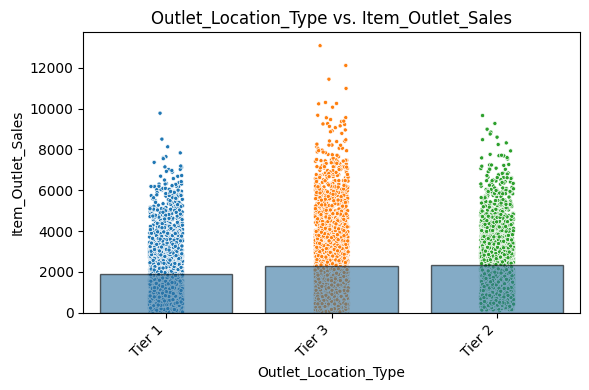

In [99]:
# Run the appropriate feature vs. target function (based on dtype)
fig, ax = plot_categorical_vs_target(df, x='Outlet_Location_Type', y='Item_Outlet_Sales', fillna=False)

-  Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes,This could be influenced by the kind of nieghbourhood of the store, distance from customer homes etc, which can influence people in their purchasing decisions.


-  Does this feature appear to be a predictor of the target?
    
     - Yes,Tier 3 outlets seem to be higher and also have  better average sales compared to tier1 and 2.




---



### Outlet Type

0) Data dictionary
-  Whether the outlet is a grocery store or some sort of supermarket

1) Univariate viz

In [100]:
#Confirming the dtype to select correct EDA function
feature = 'Outlet_Type'
df[feature].dtype

dtype('O')

<ipython-input-78-6787954fdc8f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


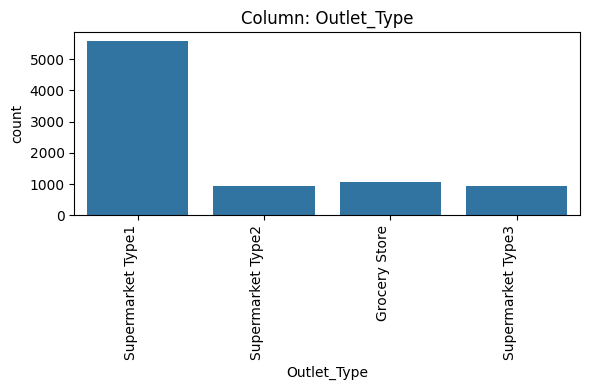

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [101]:
#Calling our custom EDA function
explore_categorical(df, 'Outlet_Type');

2) Feature Observations

1.  What type of feature is it? (Categorical (nominal), ordinal, numeric)

     - Categorical(nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    - zero null values.(o.o%)

    - Nothing to drop or impute

3. Is the feature constant or quasi-constant?
    - No

4. What is the cardinality? Is it high (>10)?
    - 4 unique categories, its low

5. Would we know this feature before the target is determined?
    - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
    - Yes, the outlet types that arent performing exceptionally in sales can be excluded.

<ipython-input-79-8eb5ed0aa4ee>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


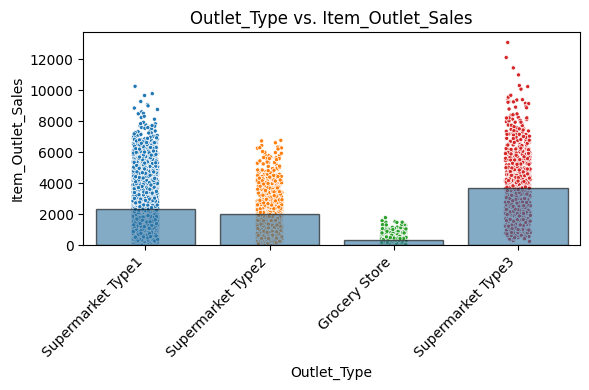

In [102]:
# Run the appropriate feature vs. target function (based on dtype)
fig, ax = plot_categorical_vs_target(df, x='Outlet_Type', y='Item_Outlet_Sales', fillna=False)

-  Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, because outlet types could have unique features that attract customers to them.


-  Does this feature appear to be a predictor of the target?
     -Yes, the type3 has a higher average sales than type 1 which has more outlets.




---



### Item Weight


0) Data dictionary

  -   Weight of product

1) Univariate Viz

In [103]:
#Confirming the dtype to select correct EDA function
feature = 'Item_Weight'
df[feature].dtype

dtype('O')

<ipython-input-78-6787954fdc8f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


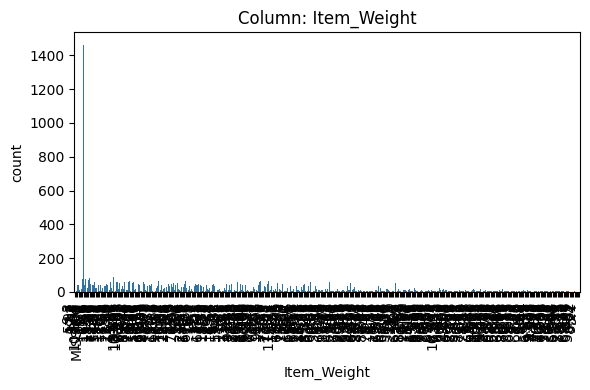

- NaN's Found: 1463 (17.17%)
- Unique Values: 416
- Most common value: 'MISSING' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [104]:
#Calling our custom EDA function
explore_categorical(df, 'Item_Weight');

1.  What type of feature is it? (Categorical (nominal), ordinal, numeric)

     - Categorical(nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    - 1463 null values.(17.17%)

    -impute with mode to maintain the distribution.

3. Is the feature constant or quasi-constant?
    - No

4. What is the cardinality? Is it high (>10)?
    - 416 unique categories, its high

5. Would we know this feature before the target is determined?
    - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
    - No

In [105]:
# Checking for lowest value for item weight
df['Item_Weight'].min()

4.555

there is no weight that has 0.

In [106]:
# filter to view null values
# Save filter of null item weight
filter_null_Item_Weight = df['Item_Weight'].isna()
filter_null_Item_Weight.sum()

1463

In [107]:
# Filter the  column for rows missing weight
check_weight = df.loc[filter_null_Item_Weight]
check_weight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,<NA>,low fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,<NA>,low fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,<NA>,regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,<NA>,low fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,<NA>,regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,<NA>,low fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,<NA>,low fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,<NA>,low fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,<NA>,regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


the null values seem to be missing at random.

<ipython-input-79-8eb5ed0aa4ee>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


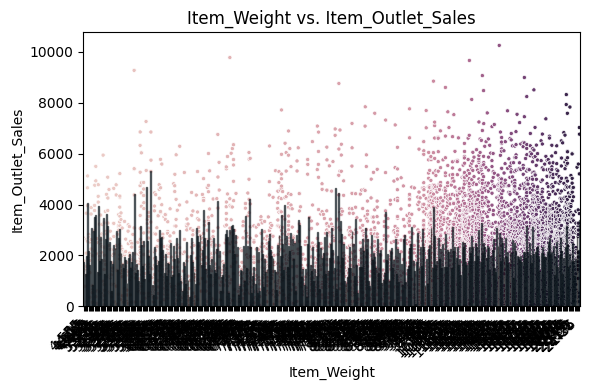

In [108]:
# Run the appropriate feature vs. target function (based on dtype)
fig, ax = plot_categorical_vs_target(df, x='Item_Weight', y='Item_Outlet_Sales', fillna=False)

-  Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes,customers tend to prefer items packaged in various weights due to factors like saving money,avoiding wastage etc.


-  Does this feature appear to be a predictor of the target?
     
     - Medium average weight items seem to bring in more sales.





---



Define functions to explore numeric features

In [109]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
   # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [110]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4)):
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

### Item Visibility

0) Data dictionary

  -  The percentage of total display area of all products in a store allocated to the particular product

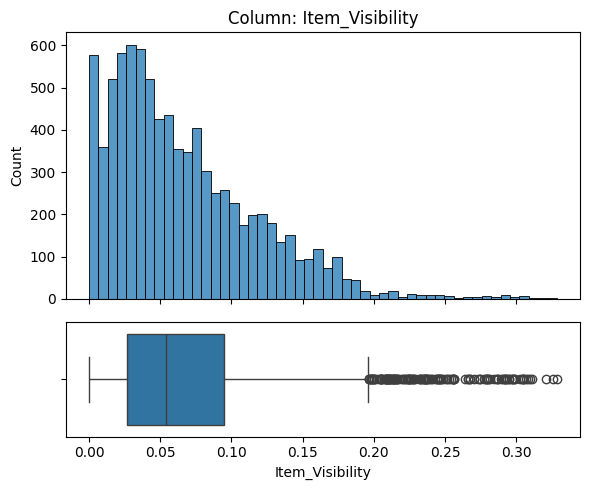

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Visibility'}, xlabel='Item_Visibility', ylabel='Count'>,
        <Axes: xlabel='Item_Visibility'>], dtype=object))

In [111]:
#explore numerical
explore_numeric(df, "Item_Visibility")

**Feature Observations**

1.  What type of feature is it? (Categorical (nominal), ordinal, numeric)

     - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    - zero null values.(o.o%)

    - Nothing to drop or impute

3. Is the feature constant or quasi-constant?
    - No

4. What is the cardinality? Is it high (>10)?
    - not applicable

5. Would we know this feature before the target is determined?
    - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
    - No,certain items need enough visibility in order to be bought.

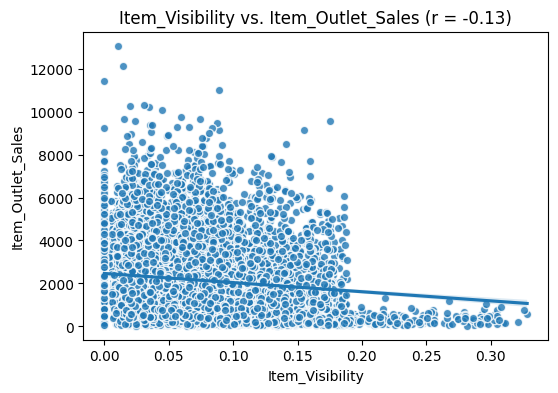

In [112]:
#Test the function of numeric col vs target
fig, ax = plot_numeric_vs_target(df, "Item_Visibility")

**Features vs. Target Observations**

-  Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, on a small scale.


-  Does this feature appear to be a predictor of the target?
     
     - The feature has weak negative correlation with the target(-0.13),its not sufficient to predict outlet item sales.




---



### Item MRP

0) Dta dictionary
  -
  Maximum Retail Price (list price) of the product

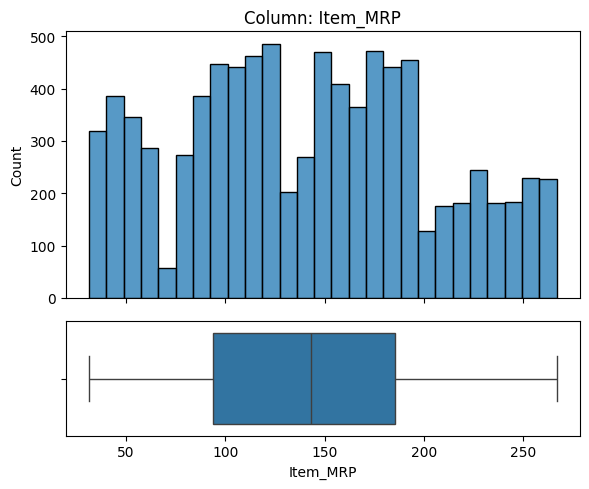

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [113]:
#explore numerical
explore_numeric(df, "Item_MRP")

**Features Observations**

1.  What type of feature is it? (Categorical (nominal), ordinal, numeric)

     - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    - zero null values.(o.o%)

    - Nothing to drop or impute

3. Is the feature constant or quasi-constant?
    - No

4. What is the cardinality? Is it high (>10)?
    - not applicable(numeric feature)

5. Would we know this feature before the target is determined?
    - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
    - No we cant exclude this feature because its vital for both sellers and consumers in their decision making about items.

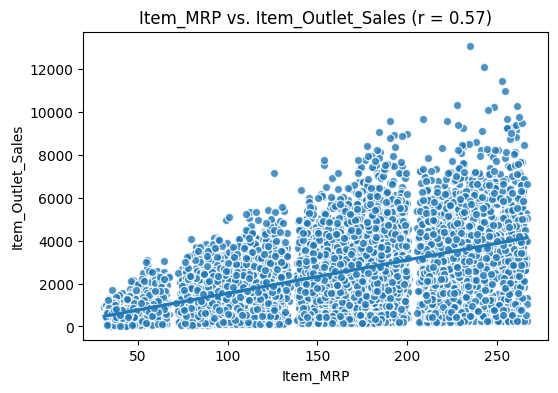

In [114]:
#Test the function of numeric col vs target
fig, ax = plot_numeric_vs_target(df, "Item_MRP")

**Features vs. Target Observations**

-  Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, items with higher retail prices could be sold on discount and thus more item sales.


-  Does this feature appear to be a predictor of the target?
     
     - Yes it does,there is a moderate positive relationship between the feature and the target(0.57), this can show that items with higher retail prices tend to have higher sales at different outlets.




---



### Outlet Establishment Year

0) Data dictionary

-    The year in which store was established

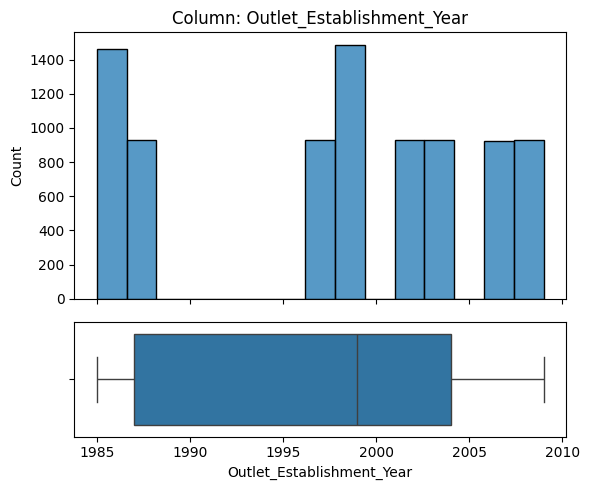

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Outlet_Establishment_Year'}, xlabel='Outlet_Establishment_Year', ylabel='Count'>,
        <Axes: xlabel='Outlet_Establishment_Year'>], dtype=object))

In [115]:
#explore numerical
explore_numeric(df, "Outlet_Establishment_Year")

**Features Observations**

1.  What type of feature is it? (Categorical (nominal), ordinal, numeric)

     - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

    - zero null values.(o.o%)

    - Nothing to drop or impute

3. Is the feature constant or quasi-constant?
    - No

4. What is the cardinality? Is it high (>10)?
    - not applicable

5. Would we know this feature before the target is determined?
    - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
    - No

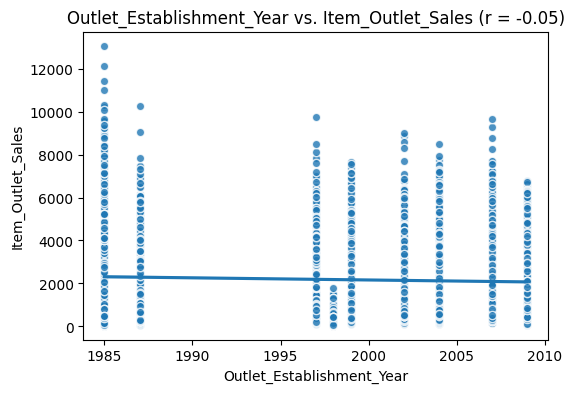

In [116]:
#Test the function of numeric col vs target
fig, ax = plot_numeric_vs_target(df, "Outlet_Establishment_Year")

**Features vs Target Observations**

-  Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Not entirely as i can see that outlets established earlier  do not necessarily have significantly higher or lower sales.


-  Does this feature appear to be a predictor of the target?
      - There is a weak negative correlation between the feature and the target(-0.05), thus the outlet year of establishment cant be relied on to predict outlet sales.




---

